In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import random
import copy

In [ ]:
def initialize_graph(n, p):
    # Generate Erdos-Renyi graph
    G = nx.erdos_renyi_graph(n, p)

    # Initialize node attributes
    for node in G.nodes:
        G.nodes[node]['state'] = 'S'  # All nodes are initially susceptible

    # Infect a random node
    initial_infected_node = random.choice(list(G.nodes))
    G.nodes[initial_infected_node]['state'] = 'I'

    return G

In [ ]:
def fixed_positions_circle(N):
    positions = {}

    # Calculate angle between nodes
    angle = 2 * math.pi / N

    # Set node positions on a circle
    for i in range(N):
        x = math.cos(i * angle)
        y = math.sin(i * angle)
        positions[i] = (x, y)

    return positions

def plot_network_with_fixed_positions(G, pos, ax, title="t = "):
    node_colors = ['red' if G.nodes[node]['state'] == 'I' else 'green' for node in G.nodes]
    nx.draw(G, pos=pos, with_labels=False, font_weight='bold', ax=ax, node_color=node_colors)
    ax.set_title(title)

In [ ]:
def si_model_step(G, beta):

    current_graph = nx.Graph(G)

    new_infected_nodes = set()

    # Iterate over all nodes
    for node in current_graph.nodes:
        if current_graph.nodes[node]['state'] == 'S':
            # Check neighbors of susceptible nodes
            neighbors = list(current_graph.neighbors(node))
            infected_neighbors = [neighbor for neighbor in neighbors if current_graph.nodes[neighbor]['state'] == 'I']

            # Determine if the node becomes infected
            for i in range(len(infected_neighbors)):
              if random.random() < beta:
                new_infected_nodes.add(node)
                break

    # Update the states of newly infected nodes
    for node in new_infected_nodes:
        current_graph.nodes[node]['state'] = 'I'

    return current_graph

In [ ]:
def temporal_step(G,n,p):

    current_graph = nx.Graph(G)
    # Create a new Erdos-Renyi graph with the same number of nodes
    new_graph = nx.erdos_renyi_graph(n,p)

    # Update edges in the original graph based on the new graph
    current_graph.clear_edges()
    current_graph.add_edges_from(new_graph.edges())

    return current_graph

In [ ]:
def count_infected_nodes(G):
    # Count the number of infected nodes
    return sum(1 for node in G.nodes if G.nodes[node]['state'] == 'I')

In [ ]:
def plot_infection_curve(infected_counts, label):
    # Set Seaborn style
    sns.set(style="whitegrid")

    # Plot the infection curve
    plt.plot(infected_counts.values(), infected_counts.keys() , marker='o', label=label, alpha=0.5)

In [ ]:
def run_simulation(N, p, beta):
    # Initialize the graph
    graph = initialize_graph(N, p)
    graph_history = [graph]

    # Simulation steps with while loop until all nodes are infected
    infected_ratios = []
    num_infected_nodes = 1

    while num_infected_nodes < graph.number_of_nodes():

        num_infected_nodes = count_infected_nodes(graph)
        infected_ratio = num_infected_nodes/N
        infected_ratios.append(infected_ratio)

        updated_graph = si_model_step(graph, beta)
        graph_history.append(updated_graph)
        updated_graph = temporal_step(updated_graph, N, p)
        graph = updated_graph

    return infected_ratios

In [ ]:
def run_simulation_rep(N, p, beta, reps, target_infections):
    results = {target: [] for target in target_infections}
    for _ in range(reps):
        graph = initialize_graph(N, p)
        graph_history = [graph]
        num_infected_nodes = 1
        time_steps = 0
        current_infections = {target: False for target in target_infections}

        while num_infected_nodes < graph.number_of_nodes():
            num_infected_nodes = count_infected_nodes(graph)
            time_steps += 1

            for target in target_infections:
                if not current_infections[target] and num_infected_nodes >= N * target:
                    results[target].append(time_steps)
                    current_infections[target] = True

            updated_graph = si_model_step(graph, beta)
            graph_history.append(updated_graph)
            updated_graph = temporal_step(updated_graph, N, p)
            graph = updated_graph

    avg_results = {target: np.mean(results[target]) for target in target_infections}
    return avg_results


In [ ]:
param_sets = [
    {'N': 10, 'p': 0.01, 'beta': 0.1},
    {'N': 20, 'p': 0.01, 'beta': 0.1},
    {'N': 50, 'p': 0.01, 'beta': 0.1},
    {'N': 100, 'p': 0.01, 'beta': 0.1},
    {'N': 200, 'p': 0.01, 'beta': 0.1},
    {'N': 500, 'p': 0.01, 'beta': 0.1},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets for Bias Coin')
plt.legend()
plt.show()

{'N': 10, 'p': 0.01, 'beta': 0.1}


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

{'N': 100, 'p': 0.001, 'beta': 0.1}
{'N': 100, 'p': 0.002, 'beta': 0.1}
{'N': 100, 'p': 0.005, 'beta': 0.1}
{'N': 100, 'p': 0.01, 'beta': 0.1}
{'N': 100, 'p': 1, 'beta': 0.1}


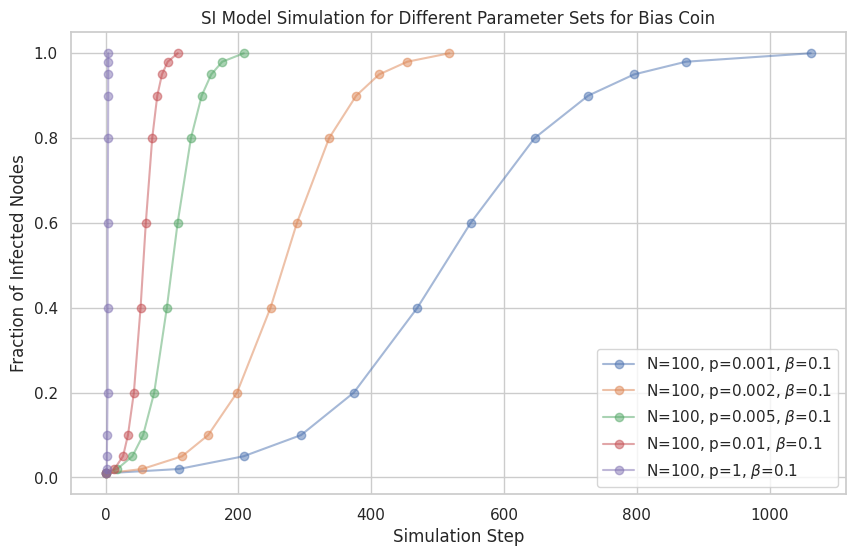

In [ ]:
param_sets = [
    {'N': 100, 'p': 0.001, 'beta': 0.1},
    {'N': 100, 'p': 0.002, 'beta': 0.1},
    {'N': 100, 'p': 0.005, 'beta': 0.1},
    {'N': 100, 'p': 0.01, 'beta': 0.1},
    {'N': 100, 'p': 1, 'beta': 0.1},
]
reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets for Bias Coin')
plt.legend()
plt.show()

{'N': 100, 'p': 0.01, 'beta': 0.01}
{'N': 100, 'p': 0.01, 'beta': 0.02}
{'N': 100, 'p': 0.01, 'beta': 0.05}
{'N': 100, 'p': 0.01, 'beta': 0.1}
{'N': 100, 'p': 0.01, 'beta': 1}


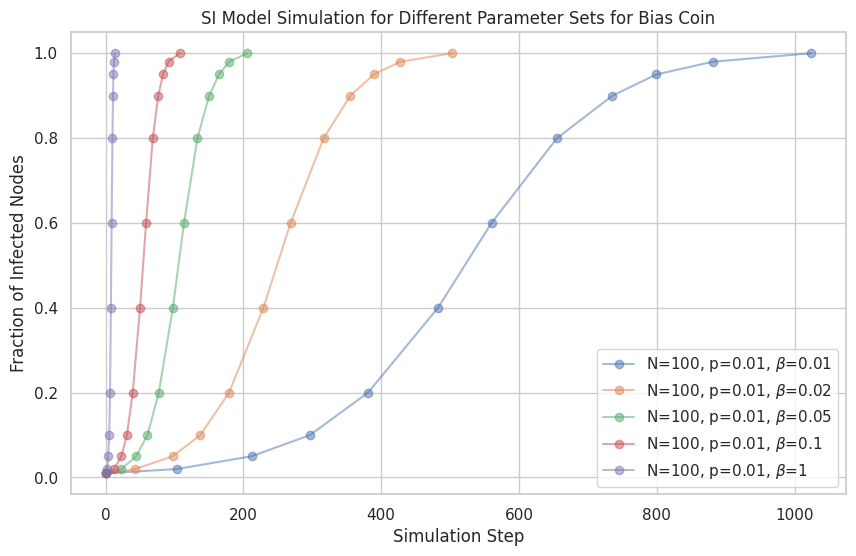

In [ ]:
param_sets = [
    {'N': 100, 'p': 0.01, 'beta': 0.01},
    {'N': 100, 'p': 0.01, 'beta': 0.02},
    {'N': 100, 'p': 0.01, 'beta': 0.05},
    {'N': 100, 'p': 0.01, 'beta': 0.1},
    {'N': 100, 'p': 0.01, 'beta': 1},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets for Bias Coin')
plt.legend()
plt.show()

# With Memory (No Consequtive 1s)

In [ ]:
def golden_mean_process(p , history):
  # If we have a zero we coin a toss (with bias p)
  # If we have a one  we generate a 0
    if history == 0:
        outcome = np.random.choice([0, 1], p=[1-p, p])
    else:
        outcome = 0
    return outcome

In [ ]:
def initialize_goden_mean_graph(n, p):
    # Stationary Probs
    p_A = 1.0/(1+p)
    p_B = p/(1+p)

    P1 = p_A * p
    P0 = 1 - P1

    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)

    for i in nodes:
        for j in range(i + 1, n):
            edge_probability = np.random.choice([1, 0], p=[P1, P0])
            if edge_probability == 1:
                G.add_edge(i, j)

    # Initialize node attributes
    for node in G.nodes:
        G.nodes[node]['state'] = 'S'  # All nodes are initially susceptible

    # Infect a random node
    initial_infected_node = random.choice(list(G.nodes))
    G.nodes[initial_infected_node]['state'] = 'I'

    return G

In [ ]:
def temporal_step_golden_mean(G, n, p):
    current_graph = nx.Graph(G)

    # Create a new graph with the same number of nodes
    new_graph = nx.Graph()
    nodes = range(n)
    new_graph.add_nodes_from(nodes)

    for i in nodes:
        for j in range(i + 1, n):

            h_ij = int(current_graph.has_edge(i, j))
            outcome = golden_mean_process(p, h_ij)
            if outcome == 1:
                new_graph.add_edge(i, j)

    # Update edges in the original graph based on the new graph
    current_graph.clear_edges()
    current_graph.add_edges_from(new_graph.edges())

    return current_graph

In [ ]:
def run_simulation_golden_mean(n, p, beta):
    # Initialize the graph
    graph = initialize_goden_mean_graph(n, p)
    graph_history = [graph]

    # Simulation steps with while loop until all nodes are infected
    infected_ratios = [1./n]
    num_infected_nodes = 1

    while num_infected_nodes < graph.number_of_nodes():

        infected_ratio = count_infected_nodes(graph)/n
        infected_ratios.append(infected_ratio)

        updated_graph = si_model_step(graph, beta)
        graph_history.append(updated_graph)
        updated_graph = temporal_step_golden_mean(updated_graph, n, p)
        graph = updated_graph

        num_infected_nodes = count_infected_nodes(graph)
        infected_ratio = num_infected_nodes/n
        infected_ratios.append(infected_ratio)

    return infected_ratios

In [ ]:
def run_simulation_golden_mean_rep(n, p, beta, reps, target_infections):

    results = {target: [] for target in target_infections}
    for _ in range(reps):
        graph = initialize_goden_mean_graph(n, p/(1+p))
        graph_history = [graph]
        num_infected_nodes = 1
        time_steps = 0
        current_infections = {target: False for target in target_infections}

        while num_infected_nodes < graph.number_of_nodes():
            num_infected_nodes = count_infected_nodes(graph)
            time_steps += 1

            for target in target_infections:
                if not current_infections[target] and num_infected_nodes >= n * target:
                    results[target].append(time_steps)
                    current_infections[target] = True

            updated_graph = si_model_step(graph, beta)
            graph_history.append(updated_graph)
            updated_graph = temporal_step_golden_mean(updated_graph, n, p)
            graph = updated_graph

    avg_results = {target: np.mean(results[target]) for target in target_infections}

    # Calculate the density for each network
    densities = [nx.density(network) for network in graph_history]

    # Calculate the average density
    average_density = sum(densities) / len(densities)

    print("Average Network Density:", average_density)

    return avg_results

{'N': 10, 'p': 0.01, 'beta': 0.1}
{'N': 20, 'p': 0.01, 'beta': 0.1}
{'N': 50, 'p': 0.01, 'beta': 0.1}
{'N': 100, 'p': 0.01, 'beta': 0.1}
{'N': 200, 'p': 0.01, 'beta': 0.1}
{'N': 500, 'p': 0.01, 'beta': 0.1}


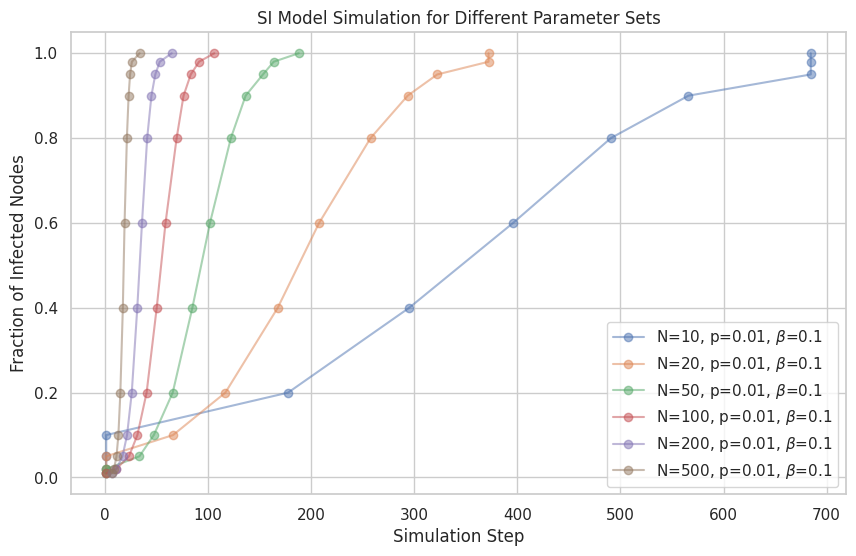

In [ ]:
param_sets = [
    {'N': 10, 'p': 0.01, 'beta': 0.1},
    {'N': 20, 'p': 0.01, 'beta': 0.1},
    {'N': 50, 'p': 0.01, 'beta': 0.1},
    {'N': 100, 'p': 0.01, 'beta': 0.1},
    {'N': 200, 'p': 0.01, 'beta': 0.1},
    {'N': 500, 'p': 0.01, 'beta': 0.1},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_golden_mean_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets')
plt.legend()
plt.show()

# Equating Densities

In [ ]:

# Existing parameter set
param_sets = [
    {'N': 10, 'p': 0.01, 'beta': 0.1},
    {'N': 20, 'p': 0.01, 'beta': 0.1},
    {'N': 50, 'p': 0.01, 'beta': 0.1},
    {'N': 100, 'p': 0.01, 'beta': 0.1},
    {'N': 200, 'p': 0.01, 'beta': 0.1},
    #{'N': 500, 'p': 0.01, 'beta': 0.1}
]

# Create a new parameter set with p updated by p/1+p to equate comparability
new_param_sets = []

for params in param_sets:
    new_params = copy.deepcopy(params)
    p = params['p']
    p_updated = p / (1 - p)
    new_params['p'] = p_updated
    new_param_sets.append(new_params)

for params in new_param_sets:
    print(params)

{'N': 10, 'p': 0.010101010101010102, 'beta': 0.1}
{'N': 20, 'p': 0.010101010101010102, 'beta': 0.1}
{'N': 50, 'p': 0.010101010101010102, 'beta': 0.1}
{'N': 100, 'p': 0.010101010101010102, 'beta': 0.1}
{'N': 200, 'p': 0.010101010101010102, 'beta': 0.1}


{'N': 10, 'p': 0.010101010101010102, 'beta': 0.1}
Average Network Density: 0.011148522259633356
{'N': 20, 'p': 0.010101010101010102, 'beta': 0.1}
Average Network Density: 0.009442060085836876
{'N': 50, 'p': 0.010101010101010102, 'beta': 0.1}
Average Network Density: 0.01020198848770277
{'N': 100, 'p': 0.010101010101010102, 'beta': 0.1}
Average Network Density: 0.010021958717610881
{'N': 200, 'p': 0.010101010101010102, 'beta': 0.1}
Average Network Density: 0.009931475559616267


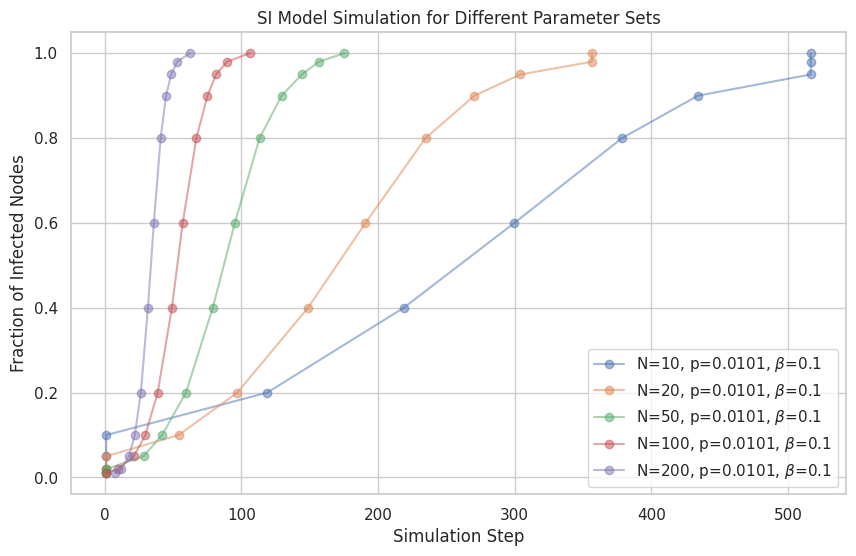

In [ ]:
reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in new_param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_golden_mean_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p:.4f}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets')
plt.legend()
plt.show()

{'N': 100, 'p': 0.001001001001001001, 'beta': 0.1}
Average Network Density: 0.0010163071391885007
{'N': 100, 'p': 0.002004008016032064, 'beta': 0.1}
Average Network Density: 0.0020434739552386704
{'N': 100, 'p': 0.005025125628140704, 'beta': 0.1}
Average Network Density: 0.005065359477124198
{'N': 100, 'p': 0.010101010101010102, 'beta': 0.1}
Average Network Density: 0.010000863334196655


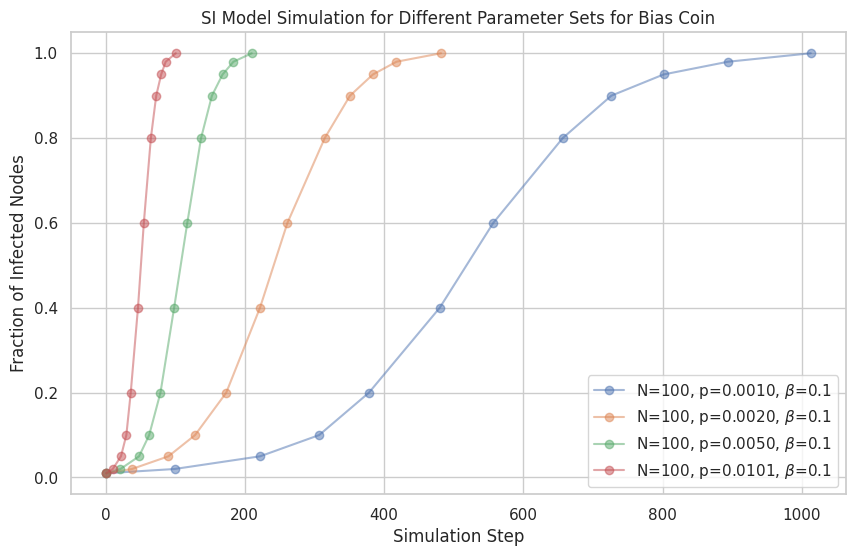

In [ ]:
param_sets = [
    {'N': 100, 'p': 0.001, 'beta': 0.1},
    {'N': 100, 'p': 0.002, 'beta': 0.1},
    {'N': 100, 'p': 0.005, 'beta': 0.1},
    {'N': 100, 'p': 0.010, 'beta': 0.1},
#    {'N': 100, 'p': 1, 'beta': 1},
]

# Create a new parameter set with p updated by p/1+p to equate comparability
new_param_sets = []

for params in param_sets:
    new_params = copy.deepcopy(params)
    p = params['p']
    p_updated = p / (1 - p)
    new_params['p'] = p_updated
    new_param_sets.append(new_params)

reps = 10
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in new_param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_golden_mean_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p:.4f}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets for Bias Coin')
plt.legend()
plt.show()

In [ ]:
param_sets = [
    {'N': 100, 'p': 0.01, 'beta': 0.01},
    {'N': 100, 'p': 0.01, 'beta': 0.02},
    {'N': 100, 'p': 0.01, 'beta': 0.05},
    {'N': 100, 'p': 0.01, 'beta': 0.1},
    {'N': 100, 'p': 0.01, 'beta': 1},
]

# Create a new parameter set with p updated by p/1+p to equate comparability
new_param_sets = []

for params in param_sets:
    new_params = copy.deepcopy(params)
    p = params['p']
    p_updated = p / (1 - p)
    new_params['p'] = p_updated
    new_param_sets.append(new_params)

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in new_param_sets:
    print(params)
    N, p, beta = params['N'], params['p'], params['beta']
    infected_ratio = run_simulation_golden_mean_rep(N, p, beta, reps, target_infections)
    label = f'N={N}, p={p:.4f}, $\\beta$={beta}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets for Bias Coin')
plt.legend()
plt.show()

{'N': 100, 'p': 0.010101010101010102, 'beta': 0.01}


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

# Dependence

In [ ]:
### This function pair two edge if and only if they have at least one node in common

def pair_edge(N, max_mem):
    # Create a complete graph with N nodes
    G = nx.complete_graph(N)
    edge_pairs = {}

    # Get all edges in the complete graph
    all_edges = list(G.edges())

    for edge in all_edges:
        #memory = random.choice(range(1, max_mem + 1))

        # Randomly choose another edge with at least one common node
        possible_edges = [e for e in all_edges if e[0] == edge[0] or e[0] == edge[1] or e[1] == edge[0] or e[1] == edge[1]]
        paired_edge = random.choice(possible_edges)

        #edge_pairs[edge] = [paired_edge, memory]
        edge_pairs[edge] = [paired_edge, max_mem]

    return edge_pairs

## Temporal Steps for Paired Bias Coin

In [ ]:
def temporal_step_paired(G,n,p,paired_edges, p_bernouli, graph_history):

    current_graph = nx.Graph(G)
    # Create a new Erdos-Renyi graph with the same number of nodes
    new_graph = nx.Graph()
    nodes = range(n)
    new_graph.add_nodes_from(nodes)

    # Update edges
    for i in nodes:
      for j in range(i + 1, n):
        # Perform a Bernoulli trial
        if random.random() < p_bernouli:
            # continue process
              outcome = np.random.choice([0,1],p=[1-p,p])
              if outcome == 1:
                  new_graph.add_edge(i, j)
        else:
            # copy from coupled edge
            try:
                k = paired_edges[(i,j)][0][0]
                l = paired_edges[(i,j)][0][1]
                mem = paired_edges[(i,j)][1]

                back_step = np.random.choice(list(range(1,mem+1)))
                #back_step  = mem

                if graph_history[-back_step].has_edge(k, l):
                  new_graph.add_edge(i, j)

            except: # memory does not exists yet : toss an unbias coin

                outcome = np.random.choice([0,1],p=[1-p,p])
                if outcome == 1:
                    new_graph.add_edge(i, j)

    # Update edges in the original graph based on the new graph
    current_graph.clear_edges()
    current_graph.add_edges_from(new_graph.edges())

    return current_graph

In [ ]:
def run_simulation_rep_paired_bias_coin(N, p, beta, reps, target_infections, max_mem, p_bernouli):
    results = {target: [] for target in target_infections}
    for _ in range(reps):
        graph = initialize_graph(N, p)
        graph_history = [graph]
        num_infected_nodes = 1
        paired_edges = pair_edge(N,max_mem)
        time_steps = 0
        current_infections = {target: False for target in target_infections}

        while num_infected_nodes < graph.number_of_nodes():
            num_infected_nodes = count_infected_nodes(graph)
            time_steps += 1

            for target in target_infections:
                if not current_infections[target] and num_infected_nodes >= N * target:
                    results[target].append(time_steps)
                    current_infections[target] = True

            updated_graph = si_model_step(graph, beta)
            graph_history.append(updated_graph)
            updated_graph = temporal_step_paired(updated_graph,N,p,paired_edges, p_bernouli, graph_history)
            graph = updated_graph

    avg_results = {target: np.mean(results[target]) for target in target_infections}
    return avg_results


{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.1, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.2, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.8, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.9, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 1.0, 'max_mem': 5}


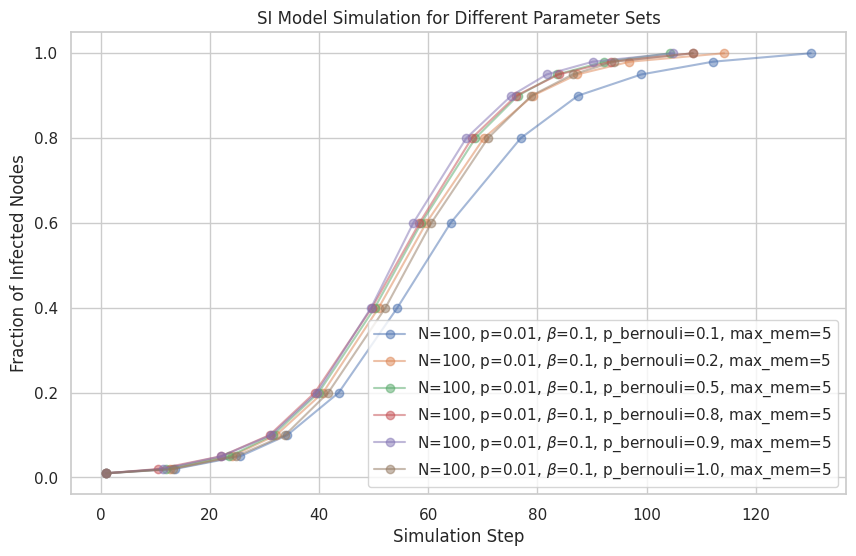

In [ ]:
# Parameters for simulation sets
param_sets = [
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.1, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.2, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.8, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.9, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 1.0, 'max_mem' : 5},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta, p_bernouli, max_mem = params['N'], params['p'], params['beta'], params['p_bernouli'], params['max_mem']
    infected_ratio = run_simulation_rep_paired_bias_coin(N, p, beta, reps, target_infections, max_mem, p_bernouli)
    label = f'N={N}, p={p}, $\\beta$={beta}, p_bernouli={p_bernouli}, max_mem={max_mem}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets')
plt.legend()
plt.show()

{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 1}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 2}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 5}


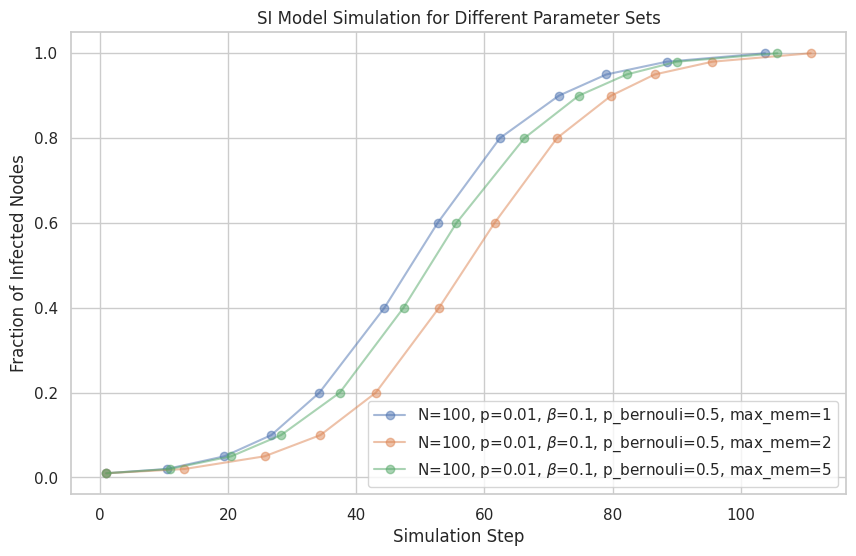

In [ ]:
# Parameters for simulation sets
param_sets = [
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 1},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 2},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 5},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta, p_bernouli, max_mem = params['N'], params['p'], params['beta'], params['p_bernouli'], params['max_mem']
    infected_ratio = run_simulation_rep_paired_bias_coin(N, p, beta, reps, target_infections, max_mem, p_bernouli)
    label = f'N={N}, p={p}, $\\beta$={beta}, p_bernouli={p_bernouli}, max_mem={max_mem}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets')
plt.legend()
plt.show()

Non-Local Pairing

In [ ]:
def noon_local_pair_edge(N, max_mem):
    # Create a complete graph with N nodes
    G = nx.complete_graph(N)
    edge_pairs = {}

    # Get all edges in the complete graph
    all_edges = list(G.edges())

    for edge in all_edges:
        paired_edge = random.choice(all_edges)

        #edge_pairs[edge] = [paired_edge, memory]
        edge_pairs[edge] = [paired_edge, max_mem]

    return edge_pairs

In [ ]:
def run_simulation_rep_nonlocal_paired_bias_coin(N, p, beta, reps, target_infections, max_mem, p_bernouli):
    results = {target: [] for target in target_infections}
    for _ in range(reps):
        graph = initialize_graph(N, p)
        graph_history = [graph]
        num_infected_nodes = 1
        paired_edges = noon_local_pair_edge(N,max_mem)
        time_steps = 0
        current_infections = {target: False for target in target_infections}

        while num_infected_nodes < graph.number_of_nodes():
            num_infected_nodes = count_infected_nodes(graph)
            time_steps += 1

            for target in target_infections:
                if not current_infections[target] and num_infected_nodes >= N * target:
                    results[target].append(time_steps)
                    current_infections[target] = True

            updated_graph = si_model_step(graph, beta)
            graph_history.append(updated_graph)
            updated_graph = temporal_step_paired(updated_graph,N,p,paired_edges, p_bernouli, graph_history)
            graph = updated_graph

    avg_results = {target: np.mean(results[target]) for target in target_infections}
    return avg_results

{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.1, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.2, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.8, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.9, 'max_mem': 5}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 1.0, 'max_mem': 5}


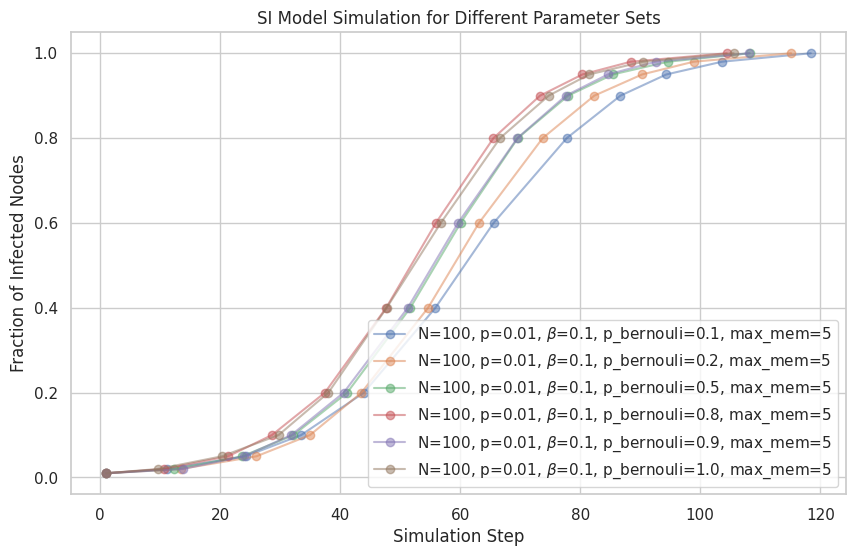

In [ ]:
# Parameters for simulation sets
param_sets = [
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.1, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.2, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.8, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.9, 'max_mem' : 5},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 1.0, 'max_mem' : 5},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta, p_bernouli, max_mem = params['N'], params['p'], params['beta'], params['p_bernouli'], params['max_mem']
    infected_ratio = run_simulation_rep_nonlocal_paired_bias_coin(N, p, beta, reps, target_infections, max_mem, p_bernouli)
    label = f'N={N}, p={p}, $\\beta$={beta}, p_bernouli={p_bernouli}, max_mem={max_mem}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets')
plt.legend()
plt.show()

{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 1}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 2}
{'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem': 5}


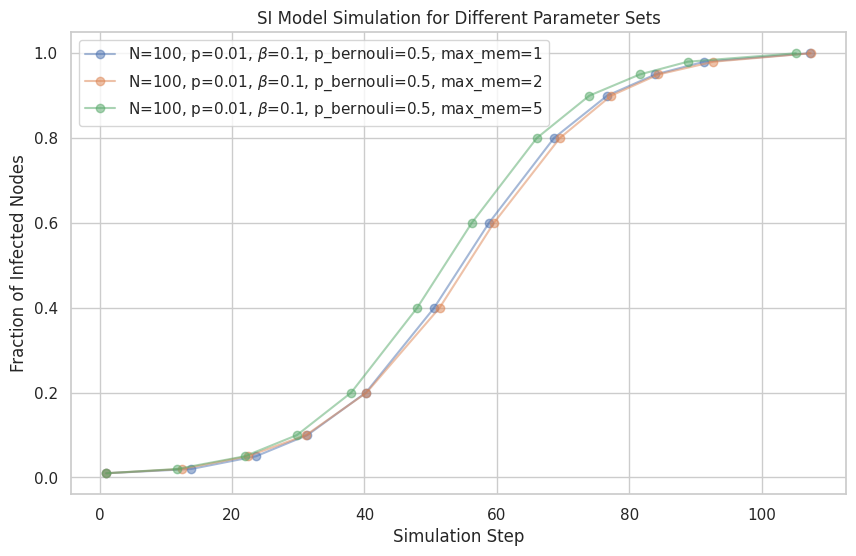

In [ ]:
# Parameters for simulation sets
param_sets = [
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 1},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 2},
    {'N': 100, 'p': 0.01, 'beta': 0.1, 'p_bernouli': 0.5, 'max_mem' : 5},
]

reps = 50
target_infections = [0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 1.0]

# Plot the results for different parameter sets
plt.figure(figsize=(10, 6), dpi=100)

for params in param_sets:
    print(params)
    N, p, beta, p_bernouli, max_mem = params['N'], params['p'], params['beta'], params['p_bernouli'], params['max_mem']
    infected_ratio = run_simulation_rep_nonlocal_paired_bias_coin(N, p, beta, reps, target_infections, max_mem, p_bernouli)
    label = f'N={N}, p={p}, $\\beta$={beta}, p_bernouli={p_bernouli}, max_mem={max_mem}'
    plot_infection_curve(infected_ratio, label)

plt.xlabel('Simulation Step')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SI Model Simulation for Different Parameter Sets')
plt.legend()
plt.show()


# Scale Free Network

In [ ]:
import networkx as nx
import random

# Create an initial scale-free network
initial_nodes = 10
G = nx.barabasi_albert_graph(initial_nodes, 2)

# Define update rules
def update_network(G, num_edges_to_rewire):
    # Rewire edges
    for _ in range(num_edges_to_rewire):
        # Select a random edge
        edge_to_rewire = random.choice(list(G.edges()))
        # Select a random node to connect to
        target_node = random.choice(list(G.nodes()))
        # Ensure that the new edge is not a self-loop and does not already exist
        while target_node == edge_to_rewire[0] or target_node == edge_to_rewire[1] or G.has_edge(edge_to_rewire[0], target_node):
            target_node = random.choice(list(G.nodes()))
        # Rewire the edge
        G.remove_edge(*edge_to_rewire)
        G.add_edge(edge_to_rewire[0], target_node)

# Update the network over time
num_steps = 100
num_edges_to_rewire = 2
for _ in range(num_steps):
    update_network(G, num_edges_to_rewire)

# Now, G contains the final state of the temporal network, with a fixed number of nodes and rewired edges
